The CTD data load and read for PAR data in this notebook

In [1]:
import numpy as np
import pandas as pd
import seabird
import matplotlib.pyplot as plt
import pycnv

# Load data CTD data from SBE19plus


In [71]:
data = pycnv.pycnv('G:/AFKABAN/SBE19plus_01908096_2023_01_24_AZ.cnv')
data.data.keys()
data.units

INFO:pycnv: Opening file: G:/AFKABAN/SBE19plus_01908096_2023_01_24_AZ.cnv


{'scan': None,
 'timeJV2': 'julian days',
 'prdM': 'db',
 'depSM': 'salt water, m',
 'tv290C': 'ITS-90, deg C',
 'potemp090C': 'ITS-90, deg C',
 'c0S/m': 'S/m',
 'sal00': 'PSU',
 'wetStar': 'mg/m^3',
 'par/sat/log': 'umol photons/m^2/sec',
 'seaTurbMtr': 'FTU',
 'flag': None}

In [101]:
temp = data.data['tv290C']
sal = data.data['sal00']
dep = data.data['depSM']
par = data.data['par/sat/log']

### select polar cod data

In [111]:
pcod_ind = np.where((data.data['timeJV2']<20) & (dep>1.5))
dep_19 = dep[pcod_ind]
temp_19 = temp[pcod_ind]
sal_19 = sal[pcod_ind]
par_19 = par[pcod_ind]


In [113]:
mean_t =  np.mean(temp_19)
mean_s = np.mean(sal_19)
mean_d = np.mean(dep_19)
print('During the AFKABAN experiment on January 19th, 2023 with Polar cod, the mean temperature was %.2f degC, salinity was %.2f PSU at depth %.2f m.' %(mean_t, mean_s, mean_d))

During the AFKABAN experiment on January 19th, 2023 with Polar cod, the mean temperature was 1.15 degC, salinity was 34.56 PSU at depth 2.35 m.


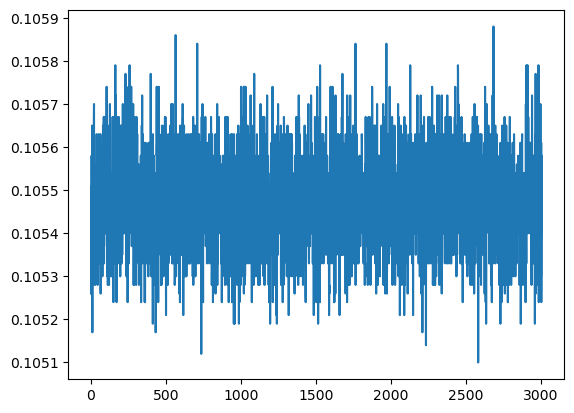

In [114]:
plt.plot(par_19)
# Maybe sensor was too far away...

# Select Atlantic cod on Jan 20th

In [117]:
acod_ind = np.where((data.data['timeJV2']>20) & (data.data['timeJV2']<21) & (dep>2))
dep_20 = dep[acod_ind]
temp_20 = temp[acod_ind]
sal_20 = sal[acod_ind]
par_20 = par[acod_ind]

In [124]:
mean_t =  np.mean(temp_20)
mean_s = np.mean(sal_20)
mean_d = np.mean(dep_20)
print('During the AFKABAN experiment on January 20th, 2023 with Atlantic cod, the mean temperature was %.2f degC, salinity was %.2f PSU at depth %.2f m.' %(mean_t, mean_s, mean_d))

During the AFKABAN experiment on January 20th, 2023 with Atlantic cod, the mean temperature was 1.50 degC, salinity was 34.60 PSU at depth 2.69 m.


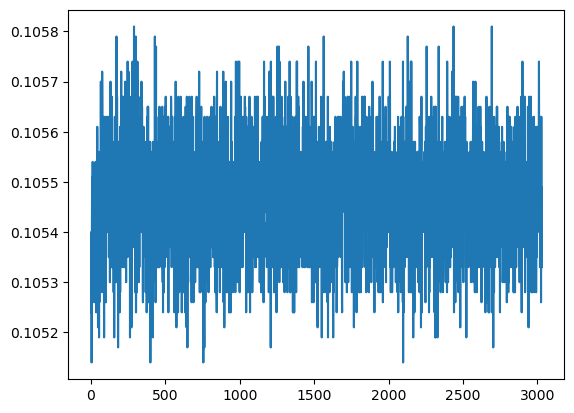

In [121]:
plt.plot(par_20)

## Select Polar cod round 2 on Jan 24th

In [128]:
pcod2_ind = np.where((data.data['timeJV2']>24) & (data.data['timeJV2']<25) & (dep>4))
dep_24 = dep[pcod2_ind]
temp_24 = temp[pcod2_ind]
sal_24 = sal[pcod2_ind]
par_24 = par[pcod2_ind]

In [129]:
mean_t =  np.mean(temp_24)
mean_s = np.mean(sal_24)
mean_d = np.mean(dep_24)
print('During the AFKABAN experiment on January 24th, 2023 with Polar cod round2, the mean temperature was %.2f degC, salinity was %.2f PSU at depth %.2f m.' %(mean_t, mean_s, mean_d))

During the AFKABAN experiment on January 24th, 2023 with Polar cod round2, the mean temperature was 1.55 degC, salinity was 34.62 PSU at depth 5.12 m.


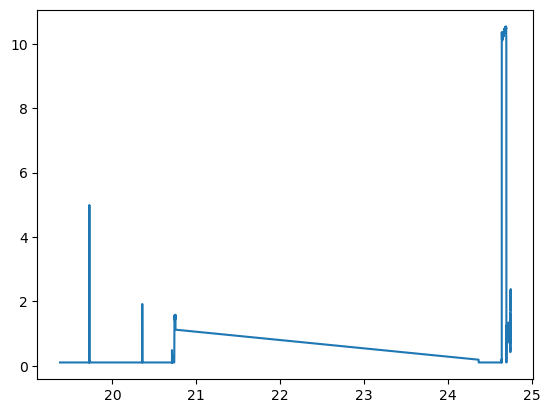

In [135]:
plt.plot(data.data['timeJV2'],par)